<a href="https://colab.research.google.com/github/simied/mypackage/blob/master/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Prediction

I will be constructing a model to predict whose likely to have loan /Granted Loan

### Hypothesis

People with a good credit history are mostly likely to be granted Loan.

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV

%matplotlib inline

#to do some plotting
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

#warning disabler
import warnings
warnings.filterwarnings("ignore")

In [0]:
train = pd.read_csv('train_ctrUa4K.csv')
test = pd.read_csv('test_lAUu6dG.csv')
sample = pd.read_csv('sample_submission_49d68Cx.csv')

In [0]:
def head_view():
    display(test.head())
    display(train.head())
    pass 
    

In [0]:
head_view()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [0]:
def shape(x,y1):
    display(x.shape)
    display(y1.shape)
    pass

In [0]:
shape(train,test)

(614, 13)

(367, 12)

In [0]:
#Creating Labels
def value_counts(name):
    return train[name].value_counts(normalize=True)

In [0]:
value_counts('Loan_Status')

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [0]:
def labels():
    
    labels=['No_Loan','Loan']
    label = pd.DataFrame(columns=labels,index=labels)
    label['No_Loan'],label['Loan'] = (train['Loan_Status']=='Y').sum(),(train['Loan_Status']=='N').sum()
    
    return label

In [0]:
target = labels()
target

,No_Loan,Loan
No_Loan,422,192
Loan,422,192


In [0]:
def labels_encod():
    #encoding the y labels of train dataset
    train['Enc_Loan_Status'] = train['Loan_Status'].apply(lambda x: 1 if x=='Y' else 0)
    return train['Enc_Loan_Status']
    

In [0]:
train['Enc_Loan_Status'] = labels_encod()
train['Enc_Loan_Status'].head()

0    1
1    0
2    1
3    1
4    1
Name: Enc_Loan_Status, dtype: int64

In [0]:
train = train.drop('Loan_Status',axis=1)

## Exploratory Data Analysis

In [0]:
def visual_labels():
    sns.countplot(x=train['Enc_Loan_Status'],data=train,hue=train['Enc_Loan_Status'])
    plt.ylabel('number of values')
    plt.xlabel('No Loan and Loan')
    plt.show
    pass

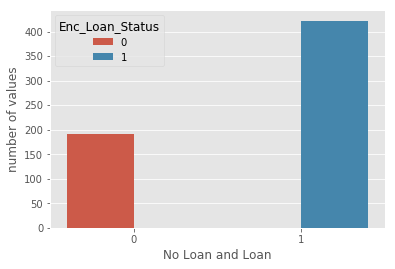

In [0]:
visual_labels()

In [0]:
def correlat():
    
# return a subset of columns matching the specified data types
    numeric_features = train.select_dtypes(include=[np.number])
    categorical_columns=train.select_dtypes(exclude=[np.number])

# displays the correlation between the columns and examine the correlations between the features and the target.
    corr = numeric_features.corr()

# The first five features are the most positively correlated with SalePrice, while the next five are the most negatively correlated.
    return (corr['Enc_Loan_Status'].sort_values(ascending=False))

In [0]:
corr = correlat()
corr

Enc_Loan_Status      1.000000
Credit_History       0.561678
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.021268
LoanAmount          -0.037318
CoapplicantIncome   -0.059187
Name: Enc_Loan_Status, dtype: float64

### combining data sets

In [0]:
def concat():
    data = pd.concat([train.iloc[:,1:],test.iloc[:,1:]],axis=0)
    return data

In [0]:
df = concat()

In [0]:
df.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Enc_Loan_Status,Gender,LoanAmount,Loan_Amount_Term,Married,Property_Area,Self_Employed
0,5849,0.0,1.0,0,Graduate,1.0,Male,NaN,360.0,No,Urban,No
1,4583,1508.0,1.0,1,Graduate,0.0,Male,128.0,360.0,Yes,Rural,No
2,3000,0.0,1.0,0,Graduate,1.0,Male,66.0,360.0,Yes,Urban,Yes
3,2583,2358.0,1.0,0,Not Graduate,1.0,Male,120.0,360.0,Yes,Urban,No
4,6000,0.0,1.0,0,Graduate,1.0,Male,141.0,360.0,No,Urban,No


In [0]:
df.shape

(981, 12)

In [0]:
#Features sepaareting by categorical and numerical values
numeric_features = df.select_dtypes(include=[np.number])

#objects variables
cat_features = df.select_dtypes(exclude=[np.number])

In [0]:
def hist_graph(df):
    df.hist(figsize=(10,10))
    return plt.show()

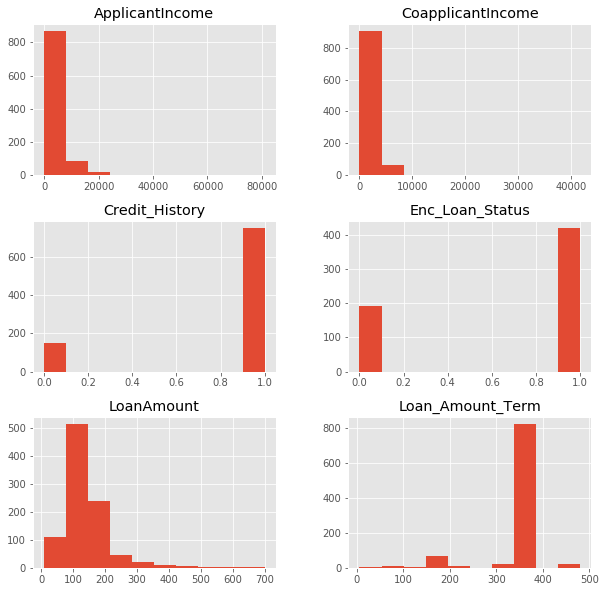

In [0]:
hist_graph(df)

* As you can see AppicantIncome ,CoapplicantIncome and Loan Amount are not normal distributed
this many be caused by outliers
* People with good credit history are mostly liked to be granted a loan

In [0]:
##Handling Outliers
def outliers(name):
    norm = np.log(df[name])
    return norm

In [0]:
df['LoanAmount'] = outliers('LoanAmount')

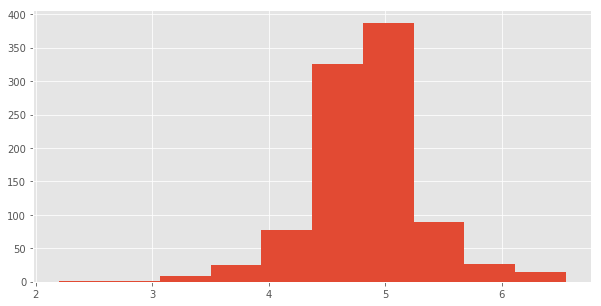

In [0]:
df['LoanAmount'].hist(figsize=(10,5))
plt.show()

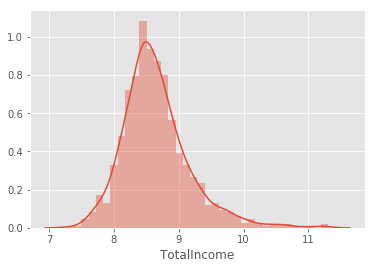

In [0]:
#combined income because coapplicant has income of 0
df['TotalIncome'] = df['ApplicantIncome']+df['CoapplicantIncome']
df['TotalIncome'] = outliers('TotalIncome')
sns.distplot(df['TotalIncome'])

In [0]:
### Data Visualization
def Visualize_data(data):
    fig,axes = plt.subplots(4,2,figsize=(12,15))
    for idx,cat_col in enumerate(data):
        row,col = idx//2,idx%2
        sns.countplot(x=cat_col,data=df,hue='Enc_Loan_Status',ax=axes[row,col])


    return plt.subplots_adjust(hspace=1)

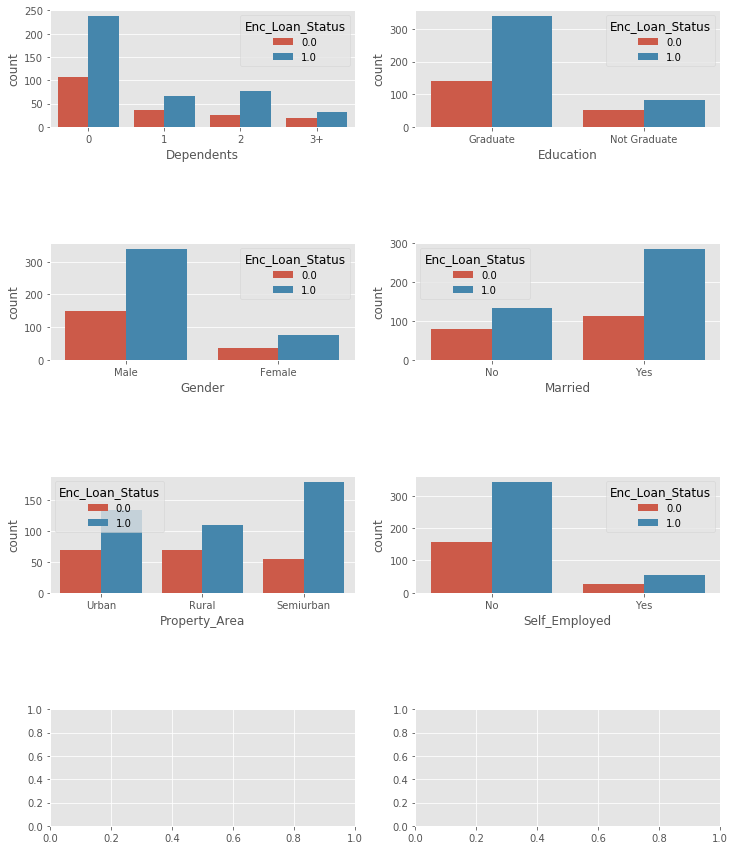

In [0]:
Visualize_data(cat_features)

* from the above we can say that people with Dependents of 0,Graduates,Married and Males are likely to get the Loan and who live in Semiurban area and not self employed

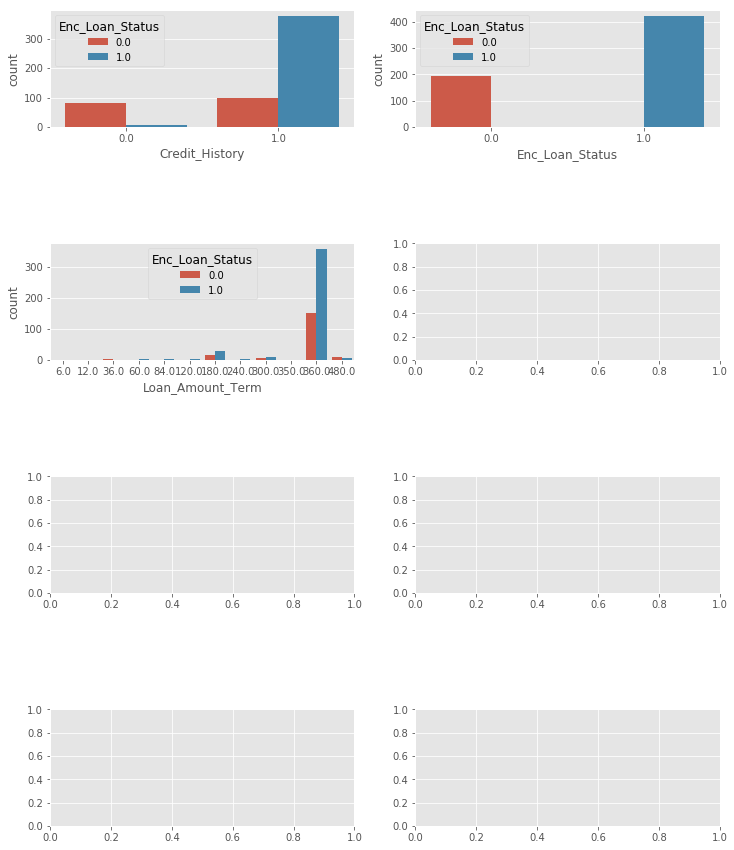

In [0]:
numeric = numeric_features.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount'],axis=1)
Visualize_data(numeric)

* It clearly now that people with a good credit history are mostly likely to be granted Loan

#### replacing/Handling Missing values

In [0]:
#Missing Values in terms of percentage
nul = ((df.isnull().sum()/len(df))*100).sort_values(ascending=False)
nul

Enc_Loan_Status      37.410805
Credit_History        8.053007
Self_Employed         5.606524
LoanAmount            2.752294
Dependents            2.548420
Gender                2.446483
Loan_Amount_Term      2.038736
Married               0.305810
TotalIncome           0.000000
Property_Area         0.000000
Education             0.000000
CoapplicantIncome     0.000000
ApplicantIncome       0.000000
dtype: float64

In [0]:
df['Dependents'] = df['Dependents'].replace({'3+':3})

In [0]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [0]:
#df['Credit_History'].fillna(df['Enc_Loan_Status'],inplace=True)
df['Credit_History'].fillna(method='bfill',inplace=True)

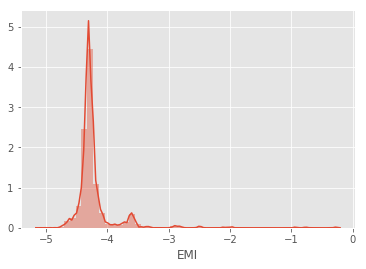

In [0]:
df['EMI']=df['LoanAmount']/df['Loan_Amount_Term']
df['EMI'] = outliers('EMI')
sns.distplot(df['EMI'])

In [0]:
#multiply to make it unit equals
df['Balance Income']=df['TotalIncome']-(df['EMI']*1000)

In [0]:
df=df.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
le = LabelEncoder()

df.Education = le.fit_transform(df.Education)
df['Property_Area'] =le.fit_transform(df['Property_Area'])
df['Married'] =le.fit_transform(df['Married'])
df['Gender'] =le.fit_transform(df['Gender'])
df['Self_Employed'] =le.fit_transform(df['Self_Employed'])

In [0]:
df = pd.get_dummies(df)
df = df.interpolate()

In [0]:
df.head()

,Credit_History,Education,Enc_Loan_Status,Gender,Married,Property_Area,Self_Employed,TotalIncome,EMI,Balance Income,Dependents_3,Dependents_0,Dependents_1,Dependents_2
0,1.0,0,1.0,1,0,2,0,8.674026,-4.309958,4318.631833,0,1,0,0
1,1.0,0,0.0,1,1,0,0,8.714568,-4.306707,4315.421371,0,0,1,0
2,1.0,0,1.0,1,1,2,1,8.006368,-4.453486,4461.492069,0,1,0,0
3,1.0,1,1.0,1,1,2,0,8.505323,-4.320097,4328.602725,0,1,0,0
4,1.0,0,1.0,1,0,2,0,8.699515,-4.286967,4295.666528,0,1,0,0


Text(0.5,1,'Heatmap of Correlation')

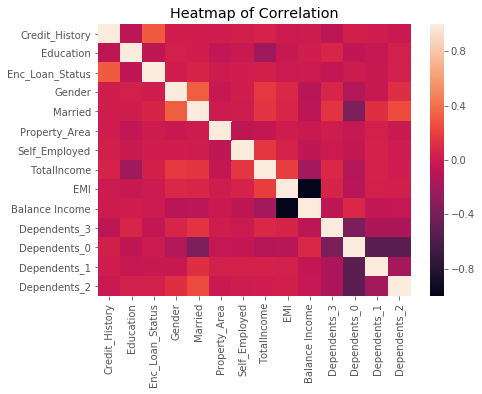

In [0]:
def heat_map():
    #heatmap
    corr = df.corr()
    plt.figure(figsize=(7,5))
    heat = sns.heatmap(data=corr)
    return plt.title('Heatmap of Correlation')
heat_map()

In [0]:
df.var()

Credit_History          0.136637
Education               0.173016
Enc_Loan_Status         0.245374
Gender                  0.151260
Married                 0.228836
Property_Area           0.642085
Self_Employed           0.106699
TotalIncome             0.271017
EMI                     0.119517
Balance Income     119448.355080
Dependents_3            0.084243
Dependents_0            0.243681
Dependents_1            0.136637
Dependents_2            0.136637
dtype: float64

In [0]:
df = df.drop(['Enc_Loan_Status','Gender','Married','Education','Property_Area','TotalIncome','EMI'],axis=1)

### Modeling Fitting and Training (Partitioning)

In [0]:
from sklearn.linear_model import LogisticRegression
# Covered in sprint 3
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Neural Network!!
from sklearn.neural_network import MLPClassifier


from sklearn import metrics
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.decomposition import PCA

In [0]:
sc = StandardScaler()
rub = RobustScaler()
pca = PCA()

df1 = rub.fit_transform(df)

df2 = sc.fit_transform(df)

df3 = pca.fit_transform(df1)

In [0]:
X = df1[:len(train)]
test_data = df1[len(train):]


In [0]:
y = train['Enc_Loan_Status']

In [0]:
# plt.figure(figsize=(15, 5))

# plt.subplot(1,2,1)
# plt.scatter(X[:,2], X[:,4], c=y)
# plt.xlabel('X labels')
# plt.ylabel('y targets values')

In [0]:
display(X.shape)
display(y.shape)
display(test_data.shape)

(614, 7)

(614,)

(367, 7)

In [0]:
X_train,X_test ,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [0]:
def train_model(X_train,y_train,lm):
    # your code here
    model1 = lm
    return model1.fit(X_train,y_train)

In [0]:
model = train_model(X_train,y_train, MLPClassifier(hidden_layer_sizes=(150,),max_iter=150,warm_start=True))
model

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(150,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=150, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=True)

In [0]:
def accuracy(X_test,y_test,model):
    pred = model.predict(X_test)
    acc = metrics.accuracy_score(y_test,pred)
    return acc
accuracy(X_test,y_test,model)    

0.8048780487804879

#### Model tuning

In [0]:
from sklearn.model_selection import StratifiedKFold
def svc_param_selection(X_train, y_train,kfold):
    
    Cs = [0.001,0.1, 0.25,0.5,1,3.5]
    penalty = ['l1','l2']
    class_weight = ['balanced',None]
    
    param_grid = {'C': Cs, 'penalty': penalty ,'class_weight':class_weight }
    
    grid_search = GridSearchCV(LogisticRegression(), param_grid,cv=kfold)
    return grid_search.fit(X_train, y_train)

In [0]:
clf1 = svc_param_selection(X_train, y_train,StratifiedKFold(n_splits=3))

pred = clf1.predict(X_test)

print(clf1.best_params_)

print(metrics.accuracy_score(y_test,pred))

print(metrics.classification_report(y_test,pred))
print(metrics.confusion_matrix(y_test,pred))

{'C': 0.1, 'class_weight': None, 'penalty': 'l1'}
0.7967479674796748
              precision    recall  f1-score   support

           0       0.95      0.44      0.60        43
           1       0.77      0.99      0.86        80

    accuracy                           0.80       123
   macro avg       0.86      0.71      0.73       123
weighted avg       0.83      0.80      0.77       123

[[19 24]
 [ 1 79]]


#### Neural Net

In [0]:
from sklearn.model_selection import StratifiedKFold
def svc_param_selection(X_train, y_train,kfold):
    param_grid={
    'learning_rate': ["constant", "invscaling", "adaptive"],
    'hidden_layer_sizes': [x for x in itertools.product((10,20,30,40,50,100),repeat=3)],
    'activation': ['relu','identity', 'logistic', 'tanh'],
    'max_iter': [1,3],
    'warm_start':[True,False]
    
    }
    
    grid_search = GridSearchCV( MLPClassifier(), param_grid,cv=kfold)
    return grid_search.fit(X_train, y_train)
# 'hidden_layer_sizes': [x for x in itertools.product((10,20,30,40,50,100),repeat=3)]
#'hidden_layer_sizes':np.arange(3, 150)

In [0]:
# clf2 = svc_param_selection(X_train, y_train,StratifiedKFold(n_splits=5))

# pred = clf2.predict(X_test)

# print(clf2.best_params_)

# print(metrics.accuracy_score(y_test,pred))

# print(metrics.classification_report(y_test,pred))
# print(metrics.confusion_matrix(y_test,pred))

### Submission

In [0]:
prediction = model.predict(test_data)

In [0]:
def predicted():
    
    sub = pd.DataFrame()
    sub['Loan_ID'] = test['Loan_ID']
    sub['Loan_Status'] = prediction
    sub['Loan_Status'] = sub['Loan_Status'].map({0:'N',1:'Y'})
    return sub

In [0]:
sub=predicted()

In [0]:
sub.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [0]:
sub['Loan_Status'].value_counts()

Y    303
N     64
Name: Loan_Status, dtype: int64

In [0]:
sub.to_csv('submission1.csv',index=False)